In [30]:
# import pandas as pd

# read the CSV file into a DataFrame
df = pd.read_csv('matala2_cosmetics_2019-Nov.csv')

df.head()

C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_12872\3399792440.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('matala2_cosmetics_2019-Nov.csv')


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


סעיף 1

In [31]:
df['event_time'] = pd.to_datetime(df['event_time'])
df = df.sort_values(by=['user_session', 'event_time'],ascending=False)
df['duration_to_next_event'] = abs(df.groupby('user_session')['event_time'].diff().dt.total_seconds())
df['duration_to_next_event'] = df['duration_to_next_event'].fillna(0)
df.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
4474648,2019-11-30 00:02:59+00:00,view,5727753,1487580013917110492,NaN,NaN,6.19,579330435,ffffd77a-a036-47bf-827c-a0758ed05d9f,0.0
159765,2019-11-02 11:47:34+00:00,view,5528034,1487580005553668971,NaN,NaN,9.52,566764549,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,0.0
1225082,2019-11-09 17:02:14+00:00,view,5847328,1982860244379763042,NaN,NaN,8.25,560528468,ffff8044-2a22-4846-8a72-999e870abbe9,0.0
3936633,2019-11-27 09:27:35+00:00,view,5676246,1487580006300255120,NaN,marathon,137.78,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,0.0
3936488,2019-11-27 09:26:21+00:00,view,5588154,1487580006300255120,NaN,irisk,77.78,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,74.0


סעיף 2

In [52]:
df['time_diff']=abs(df.groupby('user_id')['event_time'].diff().fillna(pd.Timedelta(seconds=0)))
# create a boolean mask indicating where time differences are greater than 5 days
panel_mask = df['time_diff'] > pd.Timedelta(days=5)

# create a new column called funnel_number per user_id
df['funnel_number'] = panel_mask.groupby(df['user_id']).cumsum() + 1

# reset funnel number to 1 for each user_id
df['funnel_number'] = df.groupby('user_id')['funnel_number'].apply(lambda x: x - x.min() + 1)
df.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,time_diff,funnel_number
4647,2019-11-01 03:55:18+00:00,cart,5753482,1487580013069861041,NaN,italwax,2.68,566310371,NaN,0.0,0 days 00:00:18,1
3347,2019-11-01 03:06:19+00:00,cart,5810672,1487580013069861041,NaN,italwax,10.32,566302755,NaN,0.0,2 days 01:24:22,1
3345,2019-11-01 03:06:06+00:00,cart,5651975,1487580012902088873,NaN,NaN,16.19,566302755,NaN,0.0,0 days 00:00:13,1
3342,2019-11-01 03:05:59+00:00,cart,5759491,1487580013011140782,NaN,italwax,1.94,566302755,NaN,0.0,0 days 00:00:07,1
1926,2019-11-01 01:57:09+00:00,cart,5850494,1487580008246412266,NaN,insight,13.97,497455802,NaN,0.0,0 days 00:00:36,1


In [68]:
long=df[df.user_id == 557616099]
long.shape[0]
long

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,time_diff,funnel_number
1347428,2019-11-10 17:21:30+00:00,view,5560970,1487580005595612013,NaN,NaN,3.0,557616099,ff7af28f-408f-4d04-87b3-5f86bf411046,0.0,0 days 00:00:00,1
1347144,2019-11-10 17:18:36+00:00,view,5620510,1487580005595612013,NaN,NaN,20.22,557616099,ff7af28f-408f-4d04-87b3-5f86bf411046,174.0,0 days 00:02:54,1
686309,2019-11-06 09:16:34+00:00,view,5889185,1897124478404526487,NaN,NaN,2.86,557616099,ff667269-925d-4ca3-8da6-e2122a71cb62,0.0,4 days 08:02:02,1
2354746,2019-11-18 12:20:52+00:00,view,5847106,1487580008263189483,NaN,NaN,10.32,557616099,ff1af5c5-ded5-4f26-a46f-d5508cfe9632,0.0,12 days 03:04:18,2
4567949,2019-11-30 15:47:53+00:00,view,5854578,1487580010645553231,NaN,jessnail,57.13,557616099,fe817e52-5895-4ba3-aec3-c48537e05ae6,0.0,12 days 03:27:01,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4528941,2019-11-30 11:27:47+00:00,view,5814046,1487580005092295511,NaN,grattol,5.95,557616099,0060abaa-cfed-4757-8b9d-0bf84787251b,0.0,22 days 22:54:10,1377
4587808,2019-11-30 17:47:33+00:00,view,5844747,1487580006317032337,NaN,NaN,4.41,557616099,005dc27a-7794-4414-881c-5b5b19e10210,0.0,0 days 06:19:46,1377
866173,2019-11-07 12:13:28+00:00,view,5783987,1487580005268456287,NaN,NaN,4.75,557616099,005d71ab-3f9d-40a1-9e4a-530a2b9796e9,0.0,23 days 05:34:05,1378
2309936,2019-11-18 07:02:48+00:00,view,5896420,1487580006300255120,NaN,jessnail,49.21,557616099,0035663b-0011-4c23-9cbb-6ad5d18c9998,0.0,10 days 18:49:20,1379


In [70]:
max_funnel_user = df.groupby('user_id')['funnel_number'].max().idxmax()

print("User with max funnel number:", max_funnel_user)

User with max funnel number: 557616099


In [62]:
max_funnel_number = df['funnel_number'].max()
max_funnel_number 

1380

## סעיף 3 

In [73]:
df['index_in_funnel'] = df.groupby(['user_id', 'funnel_number']).cumcount() + 1
long=df[df.user_id == 557616099]
long

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,time_diff,funnel_number,index_in_funnel
1347428,2019-11-10 17:21:30+00:00,view,5560970,1487580005595612013,NaN,NaN,3.0,557616099,ff7af28f-408f-4d04-87b3-5f86bf411046,0.0,0 days 00:00:00,1,1
1347144,2019-11-10 17:18:36+00:00,view,5620510,1487580005595612013,NaN,NaN,20.22,557616099,ff7af28f-408f-4d04-87b3-5f86bf411046,174.0,0 days 00:02:54,1,2
686309,2019-11-06 09:16:34+00:00,view,5889185,1897124478404526487,NaN,NaN,2.86,557616099,ff667269-925d-4ca3-8da6-e2122a71cb62,0.0,4 days 08:02:02,1,3
2354746,2019-11-18 12:20:52+00:00,view,5847106,1487580008263189483,NaN,NaN,10.32,557616099,ff1af5c5-ded5-4f26-a46f-d5508cfe9632,0.0,12 days 03:04:18,2,1
4567949,2019-11-30 15:47:53+00:00,view,5854578,1487580010645553231,NaN,jessnail,57.13,557616099,fe817e52-5895-4ba3-aec3-c48537e05ae6,0.0,12 days 03:27:01,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4528941,2019-11-30 11:27:47+00:00,view,5814046,1487580005092295511,NaN,grattol,5.95,557616099,0060abaa-cfed-4757-8b9d-0bf84787251b,0.0,22 days 22:54:10,1377,1
4587808,2019-11-30 17:47:33+00:00,view,5844747,1487580006317032337,NaN,NaN,4.41,557616099,005dc27a-7794-4414-881c-5b5b19e10210,0.0,0 days 06:19:46,1377,2
866173,2019-11-07 12:13:28+00:00,view,5783987,1487580005268456287,NaN,NaN,4.75,557616099,005d71ab-3f9d-40a1-9e4a-530a2b9796e9,0.0,23 days 05:34:05,1378,1
2309936,2019-11-18 07:02:48+00:00,view,5896420,1487580006300255120,NaN,jessnail,49.21,557616099,0035663b-0011-4c23-9cbb-6ad5d18c9998,0.0,10 days 18:49:20,1379,1


## סעיף 4

In [91]:
import re
df['price'] = df['price'].replace('[^\d.]+', '', regex=True).astype(float)

df.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,time_diff,funnel_number,index_in_funnel
4474648,2019-11-30 00:02:59+00:00,view,5727753,1487580013917110492,NaN,NaN,NaN,579330435,ffffd77a-a036-47bf-827c-a0758ed05d9f,0.0,0 days 00:00:00,1,1
159765,2019-11-02 11:47:34+00:00,view,5528034,1487580005553668971,NaN,NaN,NaN,566764549,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,0.0,0 days 00:00:00,1,1
1225082,2019-11-09 17:02:14+00:00,view,5847328,1982860244379763042,NaN,NaN,NaN,560528468,ffff8044-2a22-4846-8a72-999e870abbe9,0.0,0 days 00:00:00,1,1
3936633,2019-11-27 09:27:35+00:00,view,5676246,1487580006300255120,NaN,marathon,NaN,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,0.0,0 days 00:00:00,1,1
3936488,2019-11-27 09:26:21+00:00,view,5588154,1487580006300255120,NaN,irisk,NaN,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,74.0,0 days 00:01:14,1,2


## סעיף 5

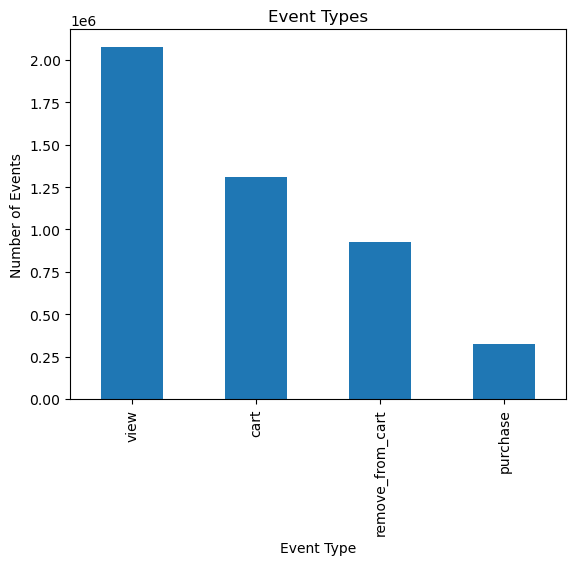

In [93]:
import matplotlib.pyplot as plt

# count the number of events for each type
event_counts = df['event_type'].value_counts()

# create a bar chart
event_counts.plot(kind='bar')

# set chart title and labels
plt.title('Event Types')
plt.xlabel('Event Type')
plt.ylabel('Number of Events')

# display the chart
plt.show()

## סעיף 6

In [113]:
session_data = df[['user_id', 'user_session' , 'funnel_number', 'index_in_funnel']].drop_duplicates(subset = 'user_session')
session_counts = df.groupby('user_session').size().reset_index(name='num_actions')
session_duration = df.groupby('user_session')['event_time'].agg(lambda x: x.max() - x.min()).reset_index(name='session_duration')
viewed_products = df[df['event_type'] == 'view'].groupby('user_session')['product_id'].apply(list).reset_index(name='list_of_viewed')
cart_products = df[df['event_type'] == 'cart'].groupby('user_session')['product_id'].apply(list).reset_index(name='list_of_added_to_cart')
purchased_products = df[df['event_type'] == 'purchase'].groupby('user_session')['product_id'].apply(list).reset_index(name='list_of_purchased')

session_data = session_counts.merge(session_duration, on='user_session', how='outer').merge(viewed_products, on='user_session', how='outer').merge(cart_products, on='user_session', how='outer').merge(purchased_products, on='user_session', how='outer').merge(session_data, on='user_session', how='outer')
session_data.head()

,user_session,num_actions,session_duration,list_of_viewed,list_of_added_to_cart,list_of_purchased,user_id,funnel_number,index_in_funnel
0,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,1.0,0 days 00:00:00,[5829298],NaN,NaN,556321594,1,1
1,00001bc6-1e04-4861-be5d-1bc73929c21a,1.0,0 days 00:00:00,[5771614],NaN,NaN,570103701,1,2
2,00001e77-5db8-4e96-ab7a-022ed3caf8b3,1.0,0 days 00:00:00,[5568472],NaN,NaN,571677620,1,1
3,00004c7d-9507-474e-a559-0fdaccaaa390,1.0,0 days 00:00:00,[5864850],NaN,NaN,504468592,6,1
4,0000597b-de39-4a77-9fe5-02c8792ca14e,3.0,0 days 00:02:31,"[5861591, 5861619, 5861620]",NaN,NaN,571211128,1,2


In [115]:
session_data=df[['user_id','user_session','funnel_number','index_in_funnel']].drop_duplicates(subset='user_session')
session_data = session_data.reset_index(drop=True)

In [117]:
session_data['num_events'] = df.groupby('user_session').size()
session_data['session_duration'] = df.groupby('user_session')['event_time'].agg(lambda x: x.max() - x.min())
session_data['list_of_viewed'] = df[df['event_type'] == 'view'].groupby('user_session')['product_id']
session_data['list_of_added_to_cart'] = df[df['event_type'] == 'view'].groupby('user_session')['product_id']
session_data['list_of_purchased'] = df[df['event_type'] == 'view'].groupby('user_session')['product_id']
session_data.head()

ValueError: Length of values (883543) does not match length of index (942023)